In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [5]:
df = pd.read_csv("../data/Customer.csv")
df.head()


,CustomerID,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


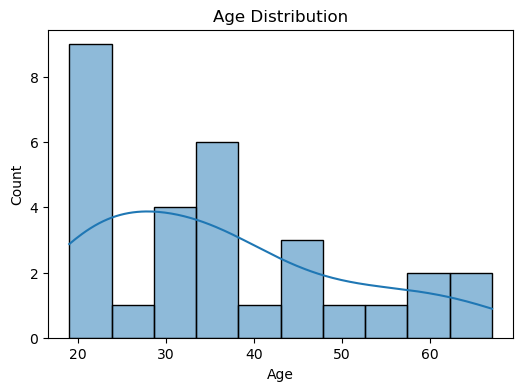

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'],bins=10, kde=True)
plt.title("Age Distribution")
plt.show()

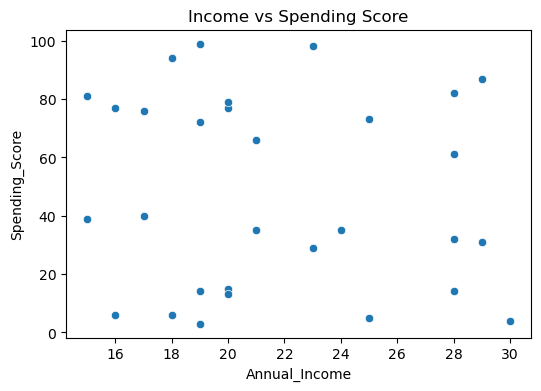

In [10]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Annual_Income',y='Spending_Score',data=df)
plt.title('Income vs Spending Score')
plt.show()

In [11]:
x = df[['Annual_Income','Spending_Score']]

In [14]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [18]:
wcss =[]

In [ ]:
for k in range(1, 11):
    kmeans =KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

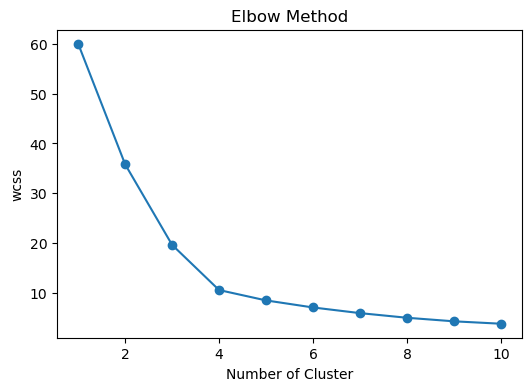

In [21]:
plt.figure(figsize=(6,4))
plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("wcss")
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(x_scaled)

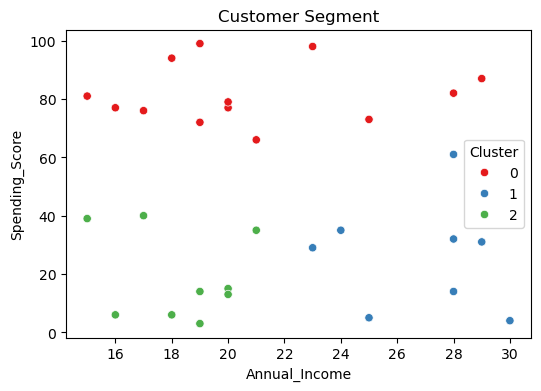

In [25]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='Cluster', palette='Set1',data=df)
plt.title("Customer Segment")
plt.show()
